# Sec3.記述統計

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## 分布(distribution)
- sns.displot(x)
- sns.catplot(x, data, kind)

In [23]:
df = sns.load_dataset(name='tips')
df['tip_rate'] = df['tip'] / df['total_bill']
df.head(3)

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587


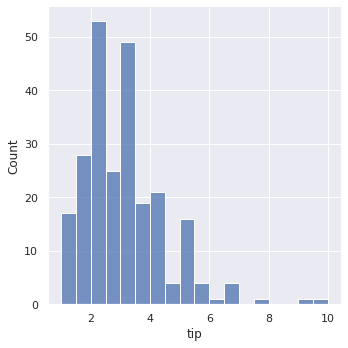

In [24]:
sns.displot(df['tip'], kde=False)

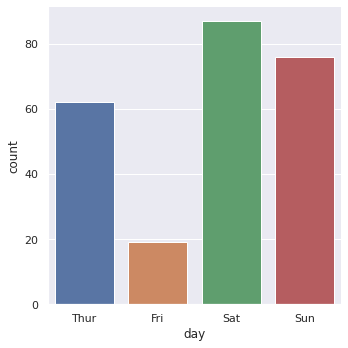

In [29]:
sns.catplot(x='day', data=df, kind='count')

## 代表値

### 平均
- 平均値を求める
  - np.mean()
  - df['column'].mean()
  - df.groupby('column').mean()
- 平均値を描画する
  - sns.barplot(x, y, data)

In [30]:
np.mean(df['tip'])

2.9982786885245902

In [31]:
df['tip'].mean()

2.9982786885245902

In [41]:
df.groupby('sex').mean()['tip_rate']

sex
Male      0.157651
Female    0.166491
Name: tip_rate, dtype: float64

<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

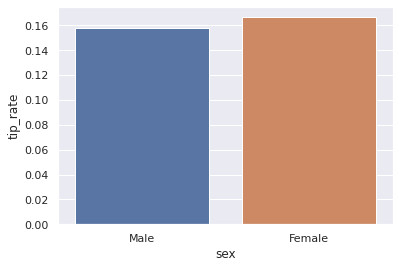

In [40]:
sns.barplot(x='sex', y='tip_rate', data=df, ci=None)

### 中央値
- 中央値を求める
  - np.median()
  - df['column'].median()
  - df.groupby('column').median()
- 中央値を描画する
  - sns.barplot(x, y, data, estimatior=np.median)

In [45]:
df.groupby('sex').median()

,total_bill,tip,size,tip_rate
sex,,,,
Male,18.35,3.00,2.0,0.153492
Female,16.40,2.75,2.0,0.155581


<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

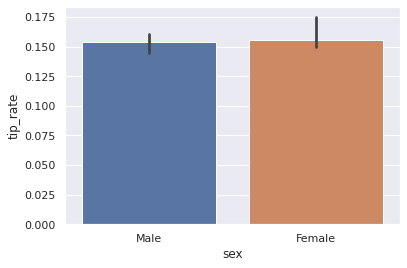

In [44]:
sns.barplot(x='sex', y='tip_rate', data=df, estimator=np.median)

### 最頻値(mode)
- 最頻値を求める
  - stats.mode()
  - df['column'].mode()

In [53]:
mode, count = stats.mode(df)

In [56]:
print(mode)
print(count)

[[13.42 2.0 'Male' 'No' 'Sat' 'Dinner' 2 0.1448225923244026]]
[[  3  33 157 151  87 176 156   2]]


In [60]:
df['day'].mode()

0    Sat
Name: day, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

## 散布度
- 範囲
- 四分位数
- 偏差

### 範囲(range)
- 最小値、最大値を求める
  - np.min(), np.max()
  - df['column'].min(), df['column'].max()
  - df.groupby('column').min(), df.groupby('column').max()

### 四分位数(qurtile)
- 第一四分位数(Q1), 第二四分位数(Q2), 第三四分位数(Q3)
- **(Q3-Q1):四分位範囲(Q3-Q1)** (IQR: Interquartile range)
- (Q3-Q1)/2:四分位偏差 (QD: quartile deviation)
- 四分位数を求める
  - np.quantile(data, [0.25, 0.5, 0.75])
  - df['column'].quantile([0.25, 0.5, 0.75])
- 四分位範囲を求める
  - stats.iqr()
- 箱ひげ図(box plot)
  - plt.boxplot()
  - sns.boxplot()

In [69]:
np.quantile(df['tip'], [0.25, 0.5, 0.75])
df['tip'].quantile([0.25, 0.5, 0.75])

array([2.    , 2.9   , 3.5625])

In [71]:
stats.iqr(df['tip'])

1.5625

<AxesSubplot:xlabel='size', ylabel='tip_rate'>

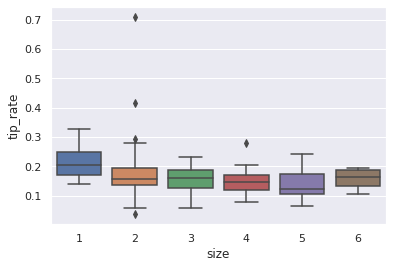

In [78]:
sns.boxplot(x='size', y='tip_rate', data=df)

### 偏差
- 平均偏差(MD: mean deviation)
- 分散(variance)
  - np.var()
- 標準偏差(SD: standard deviation)
  - np.std()

In [79]:
np.var(df['tip_rate'])

0.0037145280013546928

In [80]:
np.std(df['tip_rate'])

0.060946927743362855